# **Stock Market Portfolio Optimization: Getting Started**

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. First we import necessary Python libraries. Then we install **yfinance** on our Python environment by executing the command below on your terminal:

- **pip install yfinance**

Then we have collected real-time stock market data of some popular Indian companies:


In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from IPython.display import display, Markdown

#  Define the time period
end_date = date.today()
start_date = end_date - timedelta(days=365)
start = start_date.strftime("%Y-%m-%d")
end   = end_date.strftime("%Y-%m-%d")

#  List of tickers
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

#  Download data with MultiIndex columns
data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=False)

#  Tidy to long format using stack
data.columns.names = ['Attribute', 'Ticker']
data_tidy = (
    data.stack(level='Ticker', future_stack=True)
        .reset_index()
)

#  Rename and reorder columns
stock_data = data_tidy[['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

#  Display header and raw DataFrame (no styling)
display(Markdown("### 📈 Sample Stock Price Data (Last 12 Months)"))
display(stock_data.head())


### 📈 Sample Stock Price Data (Last 12 Months)

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2024-07-22,HDFCBANK.NS,1624.676880,1642.550049,1651.000000,1612.650024,1617.000000,26872411
1,2024-07-22,INFY.NS,1765.620972,1810.849976,1823.000000,1792.949951,1800.150024,8462126
2,2024-07-22,RELIANCE.NS,1495.598999,1500.675049,1537.500000,1499.275024,1537.250000,19674376
3,2024-07-22,TCS.NS,4224.898438,4287.350098,4319.950195,4265.000000,4299.950195,1896386
4,2024-07-23,HDFCBANK.NS,1600.789673,1618.400024,1647.800049,1605.000000,1647.550049,26001076


---

## **Adjusted Close Time-Series**

Now we calculate the year-long stock market performance of these companies by plotting a **multi-line chart** of *Adjusted Close* versus time.



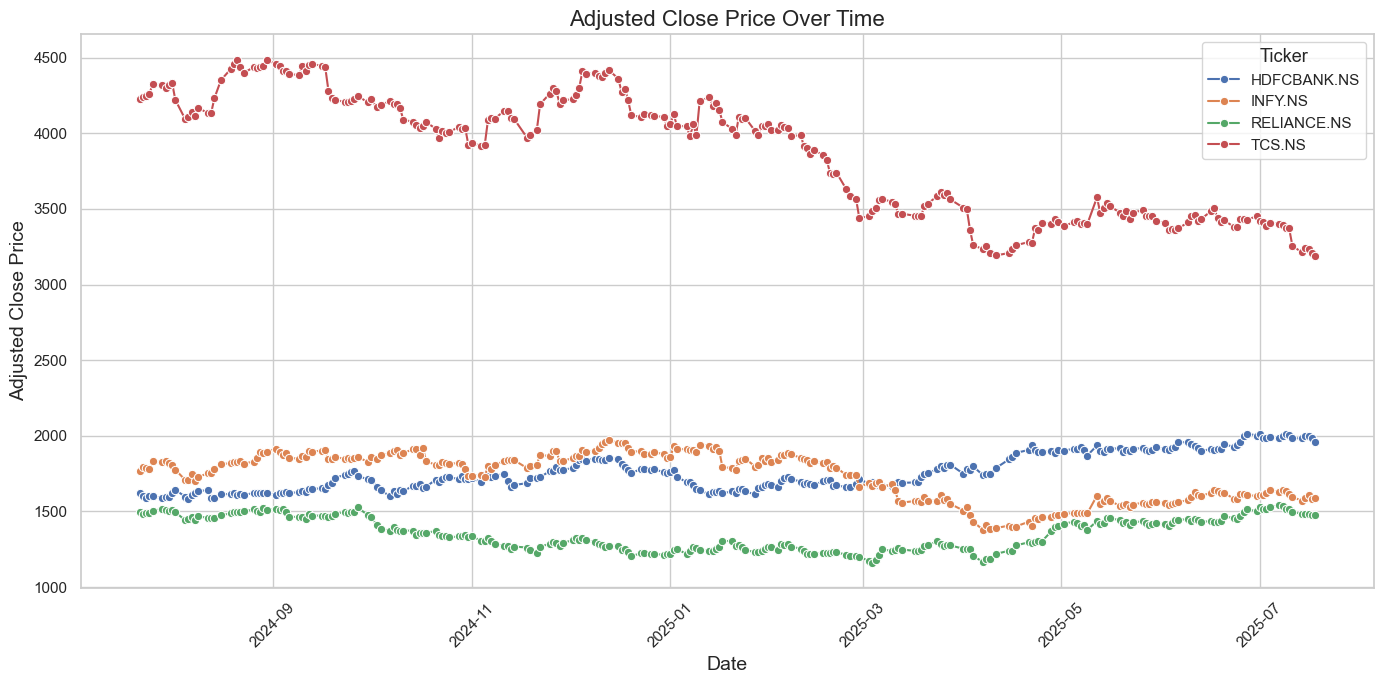

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Ensure 'Date' is datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

#  Plot using seaborn lineplot
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The graph displays the adjusted close prices of four stocks **(HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS)** over time from **July 2024 to July 2025**. It highlights that:

- **TCS has the highest adjusted close prices**, followed by RELIANCE, INFY (Infosys), and HDFCBANK.  
- The **prices for RELIANCE and TCS show noticeable upward trends**, which indicates strong performance.  
- **HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations**.

---


## **Moving Averages Calculation**

Now we compute the **50-day and 200-day moving averages** and plot these along with the Adjusted Close price for each stock:


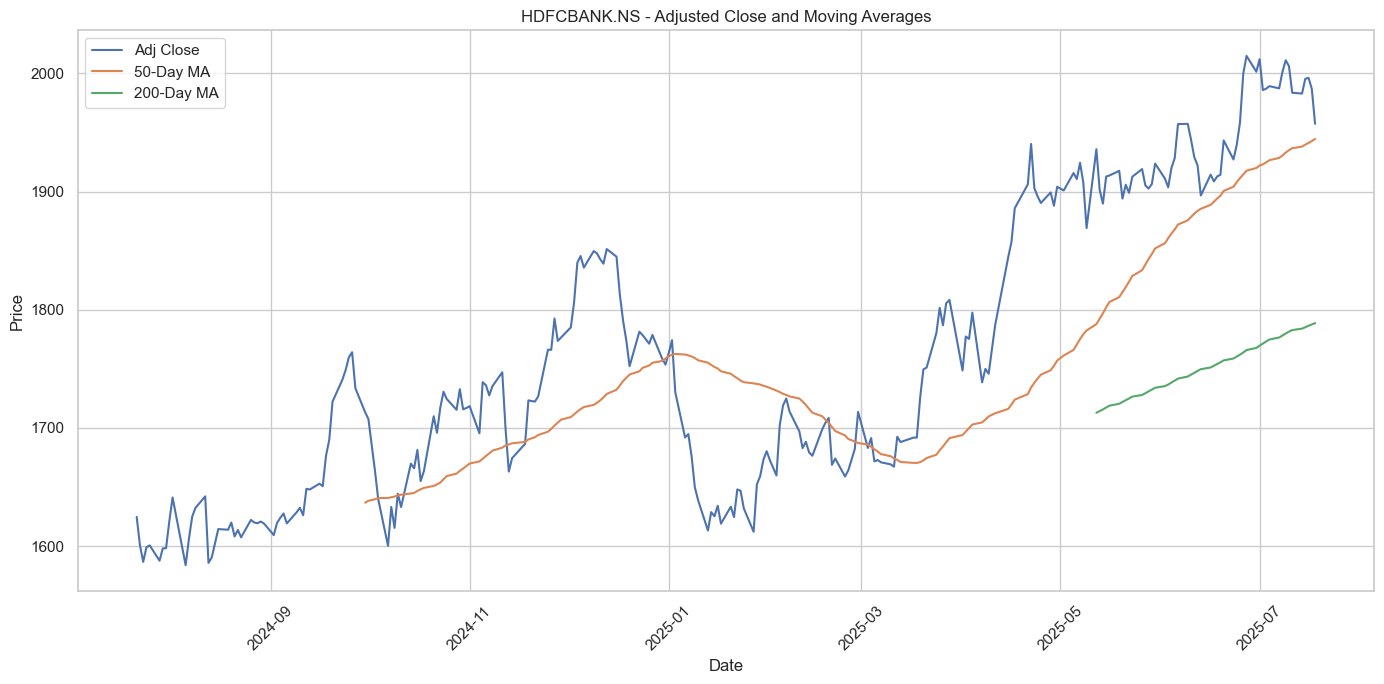

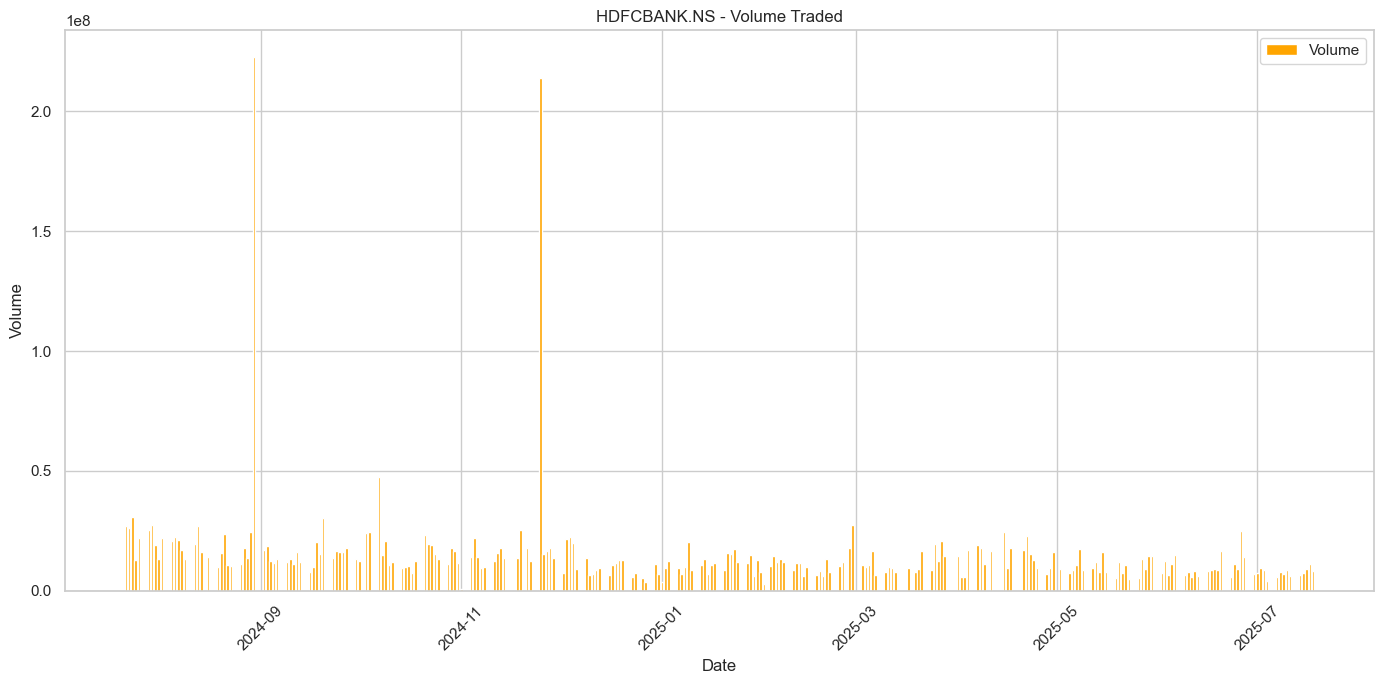

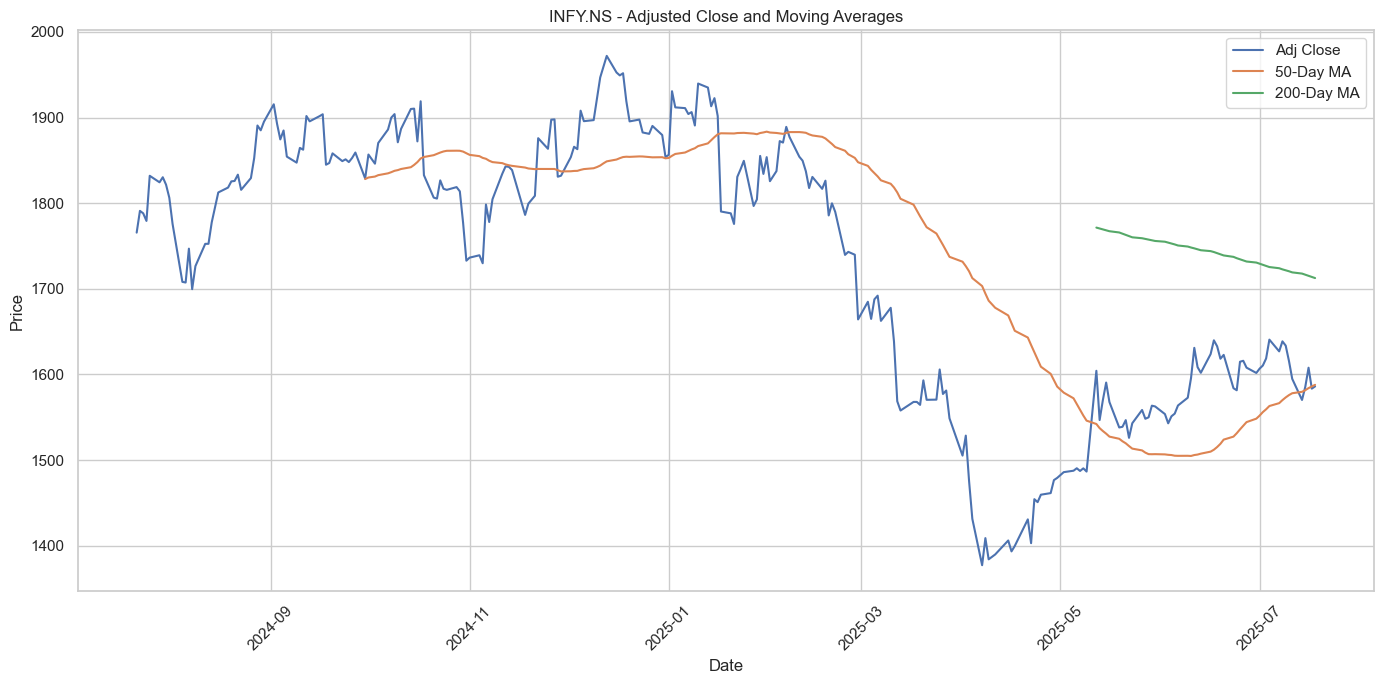

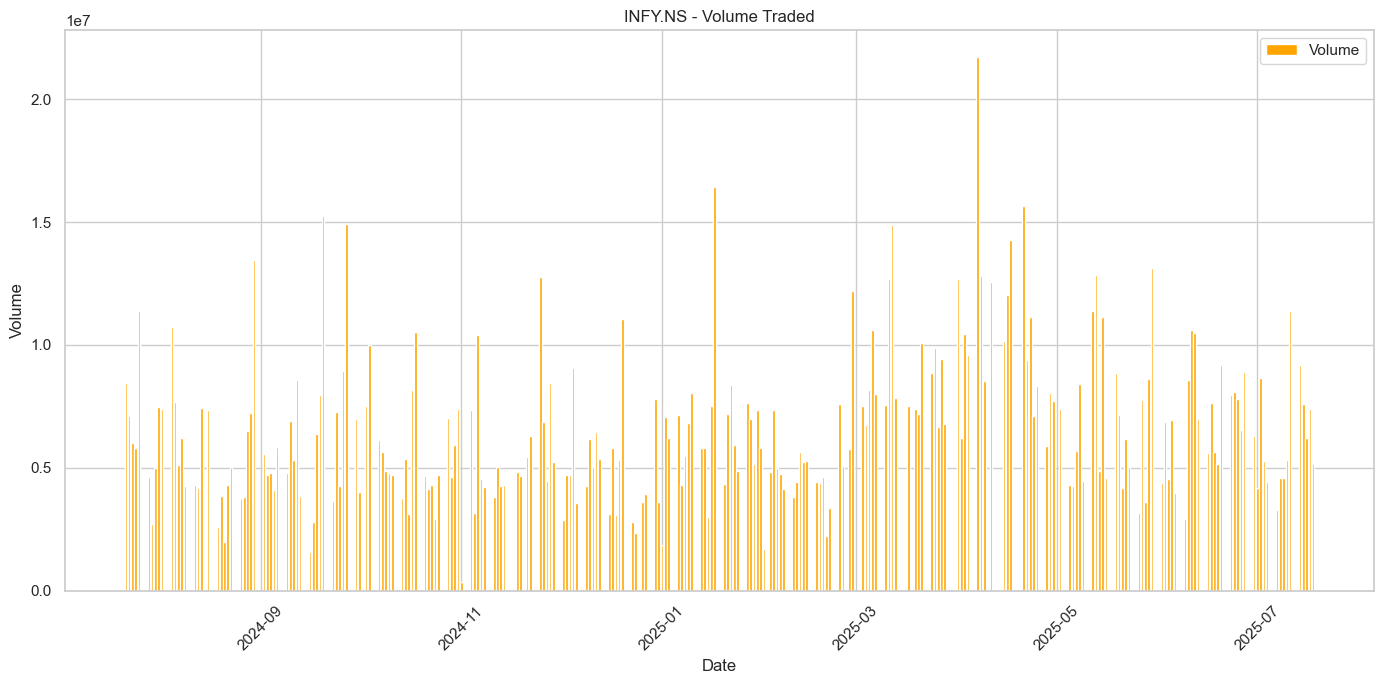

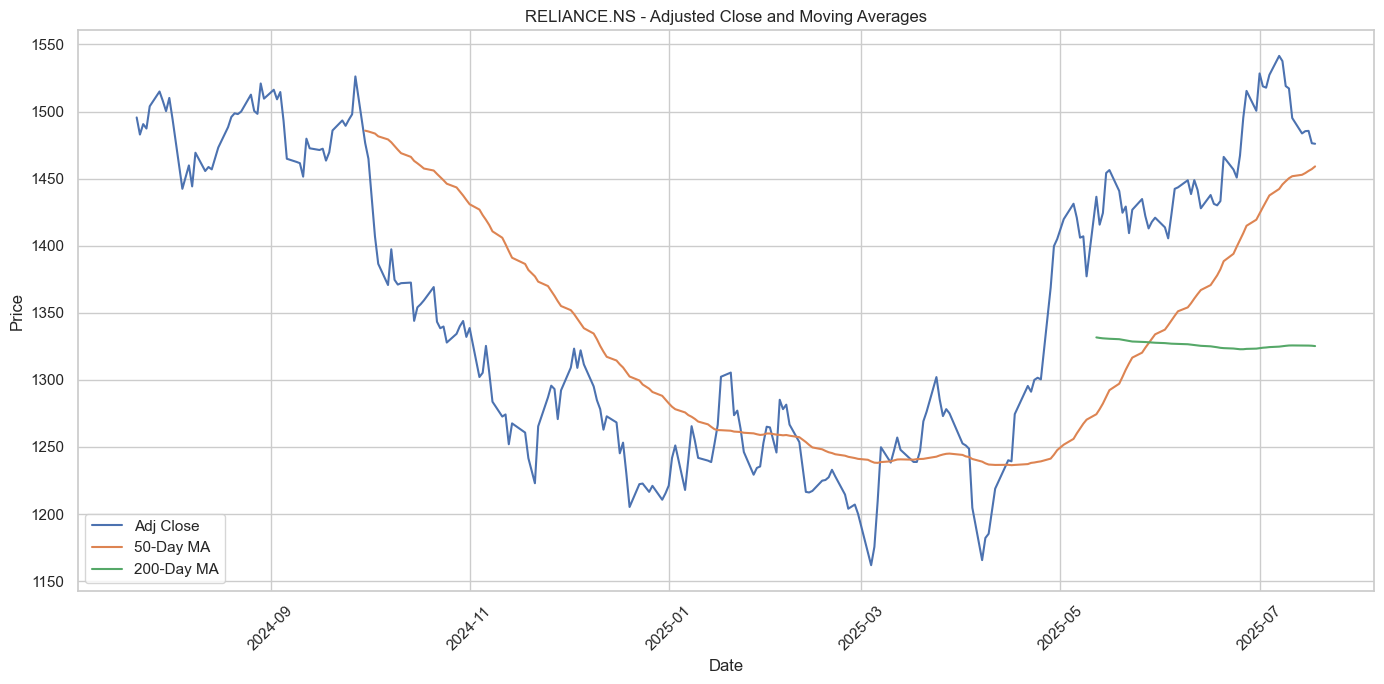

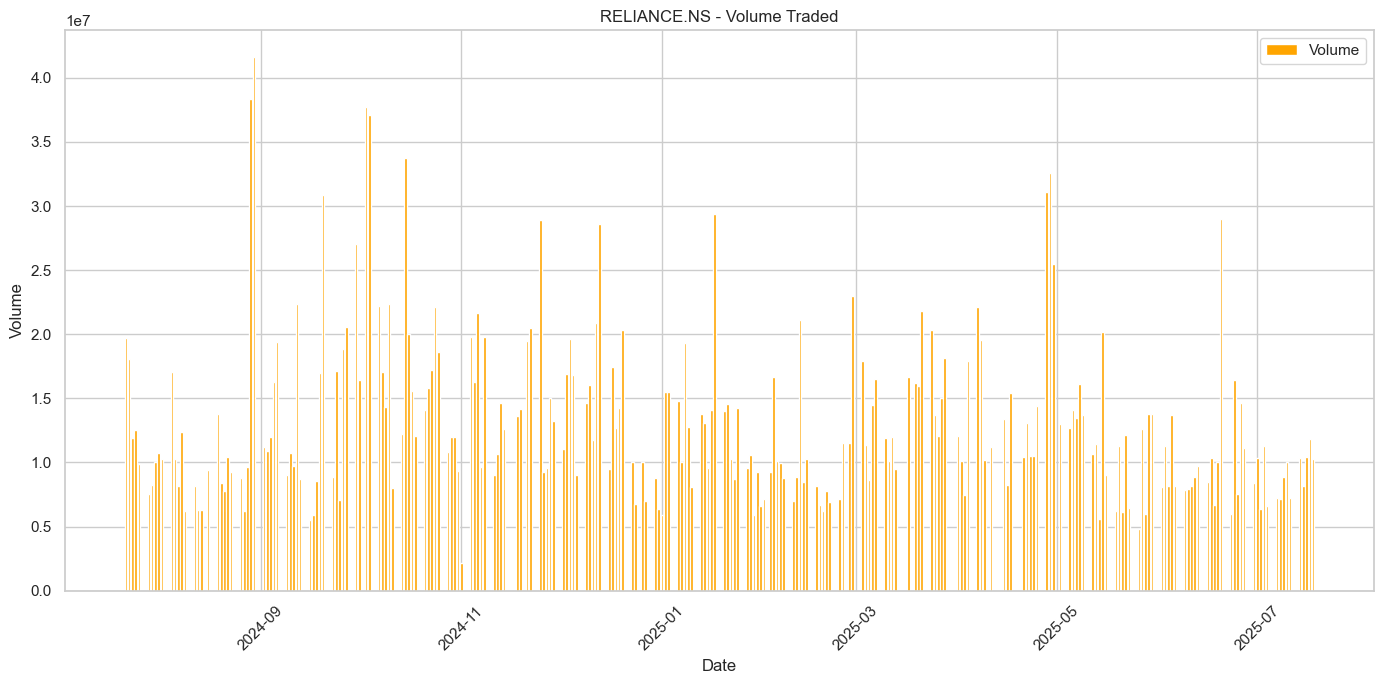

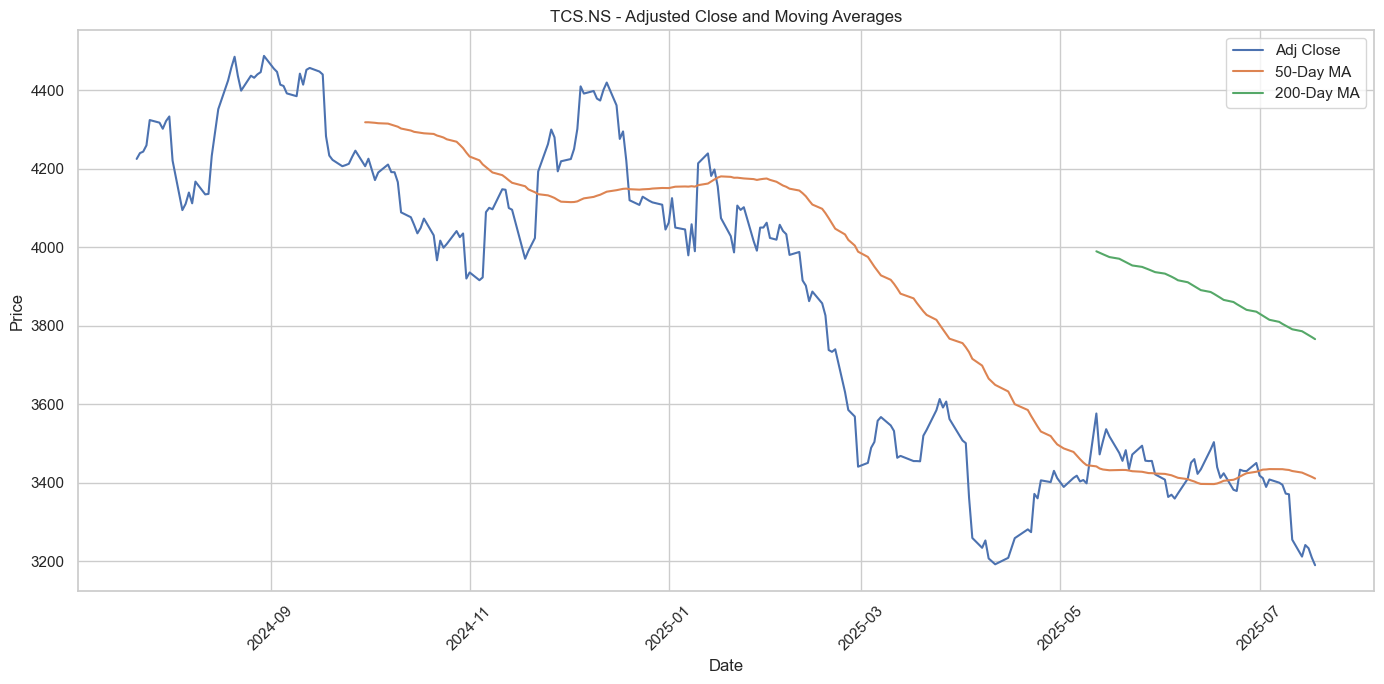

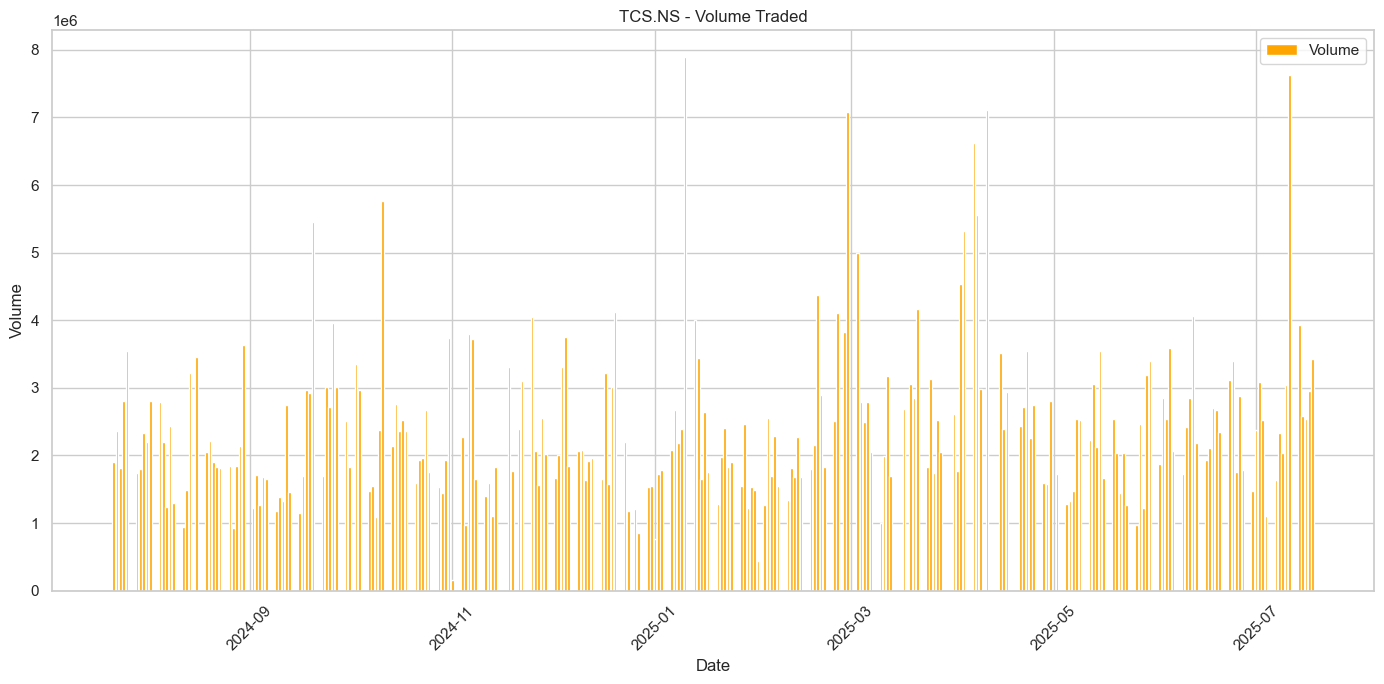

In [3]:
#  Prepare final data
stock_data = data_tidy[['Date', 'Ticker', 'Adj Close', 'Volume']]
stock_data.set_index('Date', inplace=True)

#  Parameters for moving averages
short_window = 50
long_window = 200

#  Plotting per ticker
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    
    # Moving averages
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    # Plot adjusted close + MAs
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot volume
    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## HDFCBANK.NS
- **Price & Moving Averages:**  
  HDFC Bank’s **50-day MA** stayed mostly below the **200-day MA** from mid-2024 to early 2025, signaling a prolonged downtrend. Around April 2025, a golden cross occurred, and prices started to recover steadily afterward.  
- **Volume:**  
  Volume activity spiked in **late July 2024** and **April 2025**, likely corresponding to major earnings events or recovery optimism.

---

## INFY.NS
- **Price & Moving Averages:**  
  Infosys showed a volatile pattern with intermittent upswings. Its **50-day MA** dipped below the **200-day MA** around February 2025, suggesting bearish sentiment. By May, the 50-day MA began a slow ascent, hinting at potential reversal.  
- **Volume:**  
  Noticeable volume spikes appeared in **August 2024** and again in **March 2025**, potentially tied to earnings or tech sector news.

---

## RELIANCE.NS
- **Price & Moving Averages:**  
  Reliance entered a correction phase starting September 2024. A bearish crossover occurred around December 2024. The moving averages began to converge in May 2025, reflecting neutral sentiment and potential for breakout.  
- **Volume:**  
  Volume picked up significantly in **October 2024** and **May 2025**, suggesting institutional interest during inflection points.

---

## TCS.NS
- **Price & Moving Averages:**  
  TCS maintained strength through late 2024 with the **50-day MA** above the **200-day MA**. However, a sharp correction in Q1 2025 brought the 50-day MA below the 200-day MA. A potential consolidation pattern emerged by June.  
- **Volume:**  
  Peak trading activity occurred in **August 2024** and **March 2025**, indicating institutional moves during trend shifts.

---


## **Daily Returns Distribution**

Next, we examine the **distribution of daily returns** for each stock:

- Visualize how often the stocks gain or lose certain percentages  
- Identify which names have fatter tails or more extreme moves  
- Lay the groundwork for volatility-based risk measures  




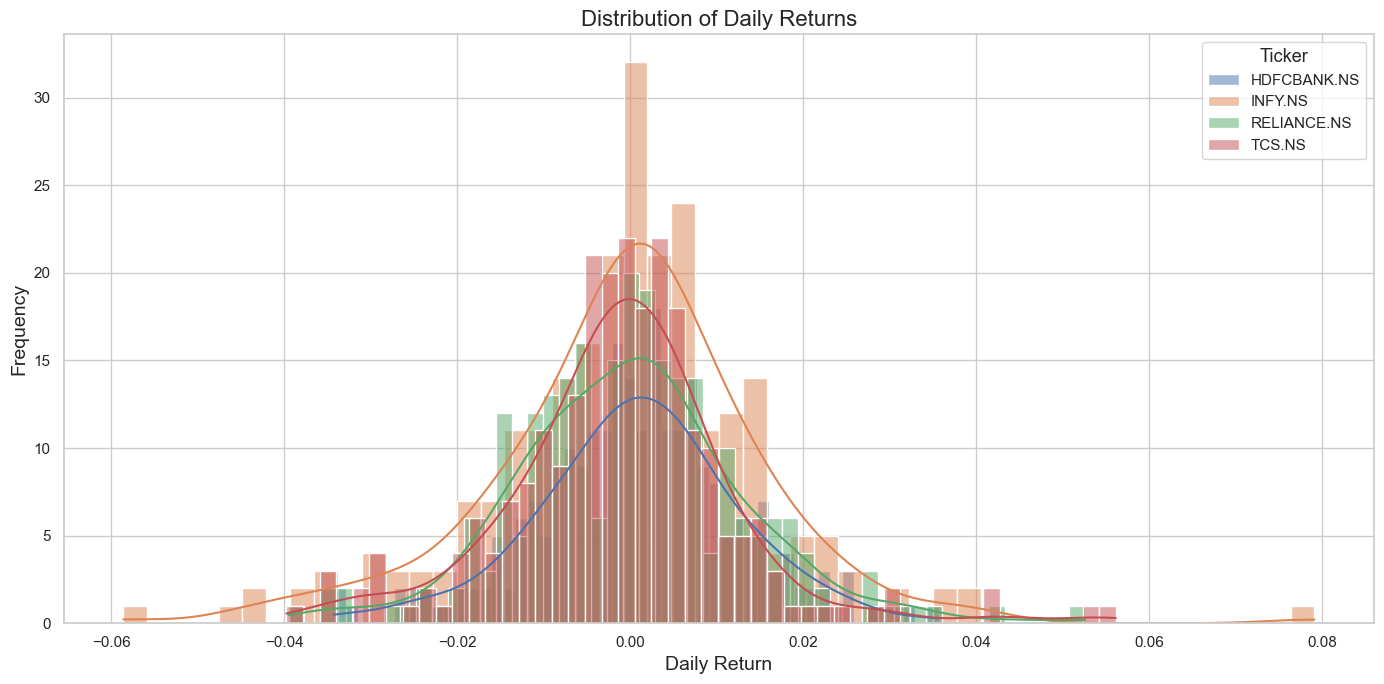

In [4]:
# Select and copy necessary columns safely
stock_data = data_tidy[['Date', 'Ticker', 'Adj Close']].copy()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Compute daily return without warning
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

# Plot histogram
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

unique_tickers = stock_data['Ticker'].unique()
for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


## Distribution of Daily Returns

Based on the plotted distributions of daily returns for the selected stocks:

- **HDFC Bank (HDFCBANK.NS)**  
  The curve is relatively narrow and centered near zero, with a slight rightward skew. This reflects **low volatility and a tendency toward stability**, making it a defensive stock in volatile markets.

- **Infosys (INFY.NS)**  
  Displays the **widest and flattest distribution**, with a high central spike but long tails on both ends—especially on the left. This implies **frequent small returns**, but also **occasional large losses or gains**, making it the **most volatile** in the group.

- **Reliance (RELIANCE.NS)**  
  Shows a moderately wide distribution with fairly symmetrical tails. Its curve is smoother than Infosys but more spread than HDFC. This indicates **medium volatility**—less stable than HDFC, but less erratic than Infosys.

- **TCS (TCS.NS)**  
  The distribution is reasonably tight and leans slightly toward the right, showing **moderate volatility** with a potential for **slightly more frequent positive returns** than negatives.

> **Key Insights:**  
> - **HDFC Bank** is your most stable option with low variance.  
> - **Infosys** poses the highest risk and reward due to its fat tails.  
> - **Reliance** offers a balanced profile—moderate risk and return.  
> - **TCS** provides decent predictability with slightly bullish bias.

> Understanding these return shapes helps fine-tune risk tolerance, Sharpe ratio targeting, and how aggressively or defensively you might allocate capital.
---


## **Correlation Matrix of Daily Returns**

In this step, we compute the **pairwise correlations** of daily returns and display them in a **heatmap**. This visualization helps us understand how closely each stock moves with the others—key information when building a well-diversified portfolio.



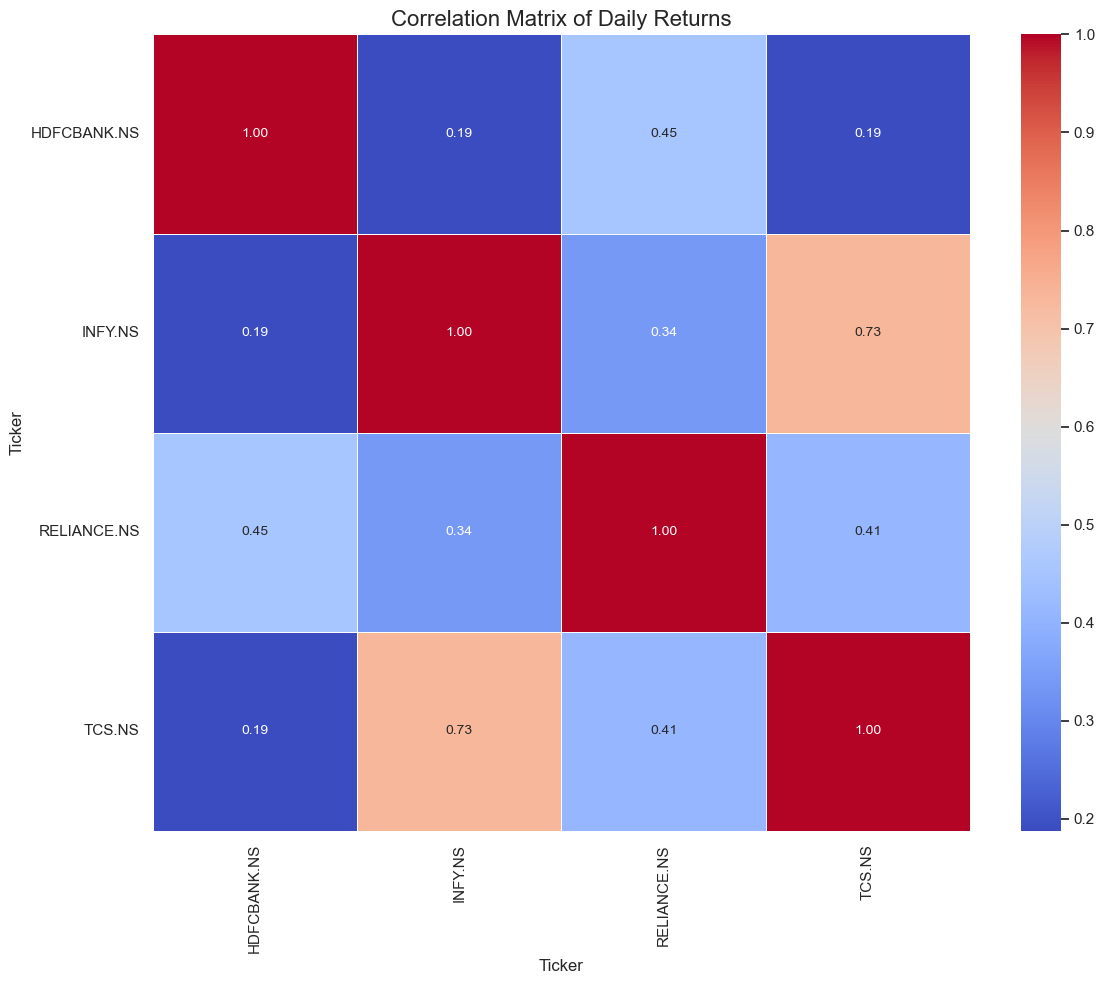

In [5]:
#  Create pivot table: Date as index, Tickers as columns, Daily Returns as values
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')

#  Compute correlation matrix
correlation_matrix = daily_returns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt='.2f',
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Heatmap Interpretation

- **INFY & TCS (0.73):**  
  This strong positive correlation indicates that **Infosys and TCS** often move together—unsurprising given their similar business models in the Indian IT sector. They’re likely influenced by the same macro and industry-specific events.

- **RELIANCE & HDFCBANK (0.45):**  
  A moderate correlation exists between **Reliance and HDFC Bank**, which may reflect shared sensitivity to broader economic cycles—though each belongs to a very different sector (energy vs. finance).

- **HDFCBANK & INFY / TCS (0.19):**  
  The correlation between **HDFC Bank** and both **Infosys** and **TCS** is quite low, suggesting that banking and tech sectors exhibit **distinct price dynamics**. This makes HDFC Bank a strong diversification candidate when paired with either IT stock.

- **RELIANCE & INFY (0.34)** and **RELIANCE & TCS (0.41):**  
  Reliance shows modest correlation with both tech firms. While not entirely independent, these co-movements are **not strong**, so Reliance still adds a layer of diversification when mixed with IT-heavy holdings.

> **Takeaway:**  
> - **Best diversification pairings:** HDFCBANK with INFY or TCS.  
> - **Most co-moving pair:** INFY and TCS, due to shared industry exposure.  
> - **Balanced portfolio tip:** Mixing across **banking, energy, and IT** sectors (e.g., HDFC + Reliance + one IT stock) offers a solid blend of correlation and independence.
---


## **Expected Returns & Volatility**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

- Calculate the **expected returns** and **volatility** for each stock.  
- Generate a series of random portfolios to identify the efficient frontier.  
- Optimize the portfolio to maximize the Sharpe ratio, a measure of risk-adjusted return.  

Let’s calculate the expected returns and volatility for each stock:


In [6]:
import numpy as np

#  Annualized expected return and volatility
expected_returns = daily_returns.mean() * 252
volatility = daily_returns.std() * np.sqrt(252)

#  Combine into one DataFrame
stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
}).reset_index()

#  Rename and format
stock_stats.columns = ['Ticker', 'Expected Return', 'Volatility']
stock_stats['Expected Return'] = stock_stats['Expected Return'].round(4)
stock_stats['Volatility'] = stock_stats['Volatility'].round(4)
stock_stats.index += 1  # Start numbering from 1

#  Display with bold headers
stock_stats.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,Ticker,Expected Return,Volatility
1,HDFCBANK.NS,0.206300,0.184400
2,INFY.NS,-0.077400,0.251800
3,RELIANCE.NS,0.008300,0.209000
4,TCS.NS,-0.264100,0.206800


## Table Interpretation

- **HDFCBANK.NS**  
  With a **20.63%** expected return and the **lowest volatility** (18.44%), HDFC Bank stands out as the most promising candidate for anchoring a long-term portfolio.

- **INFY.NS**  
  A **–7.74%** expected return coupled with the **highest volatility** (25.18%) suggests Infosys delivered a poor risk-adjusted performance during this period—high risk for negative payoff.

- **RELIANCE.NS**  
  Shows a modest **0.83%** expected return and moderate volatility (20.90%), placing it in a neutral zone—neither strong nor particularly weak, but not compelling either.

- **TCS.NS**  
  Delivers the **worst return** at **–26.18%** with mid-range volatility (20.66%), indicating sharp underperformance without any compensating reduction in risk.

> **Key takeaway:**  
> **HDFC Bank** offers the best return per unit of risk and should be prioritized in portfolio construction. **INFY and TCS** show clear red flags due to high volatility and negative returns, while **Reliance** remains a borderline inclusion depending on diversification needs.
---


## **Expected Return vs Volatility (Annualized)**

This chart provides a **side-by-side comparison** of each stock’s annualized **expected return** and **volatility**:

- The **blue bars** represent the expected return—how much you might gain (or lose) annually from each stock.
- The **orange bars** represent annualized volatility—how much the stock’s price fluctuates, which reflects investment risk.

This visual is essential for understanding the **risk–reward trade-off** of each asset. Ideally, you want stocks with **higher returns and lower volatility**—a combination that yields better risk-adjusted performance.

> In the next step, we’ll use this risk–return information to simulate thousands of portfolio combinations and identify the most efficient ones using the **Sharpe ratio**.


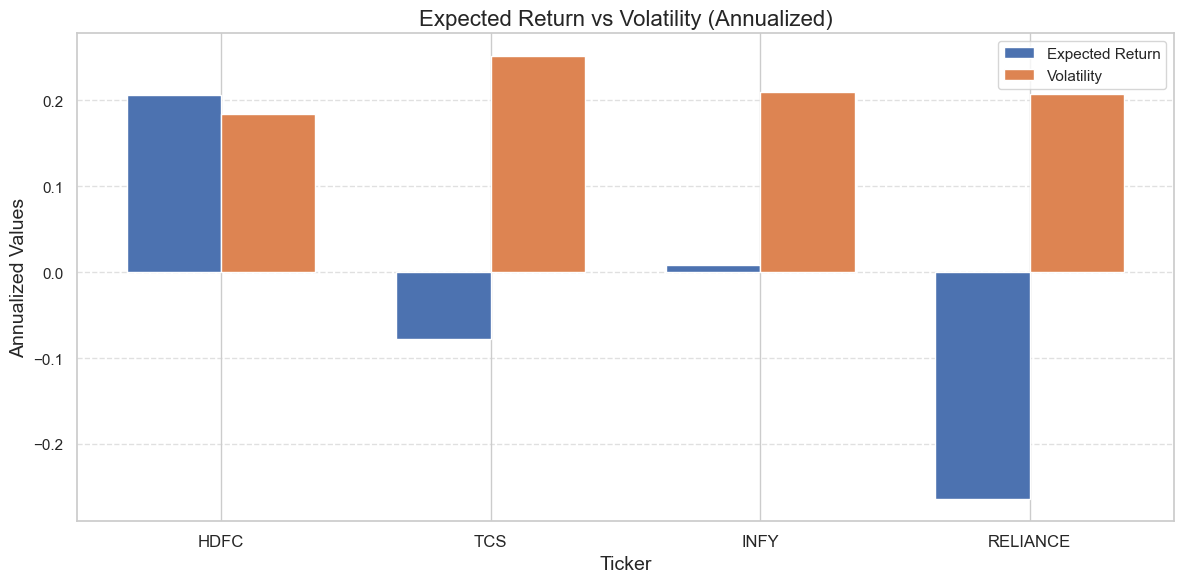

In [7]:

#  Copy and set readable stock names as index (minimal addition)
stock_stats = stock_stats.copy()
stock_stats.index = ['HDFC', 'TCS', 'INFY', 'RELIANCE']  # You can also use full tickers if preferred

#  Bar chart to compare Expected Return and Volatility
plt.figure(figsize=(12, 6))

# Set position and width
x = np.arange(len(stock_stats))
width = 0.35

# Bar plots
plt.bar(x - width/2, stock_stats['Expected Return'], width, label='Expected Return')
plt.bar(x + width/2, stock_stats['Volatility'], width, label='Volatility')

# Title and labels
plt.title('Expected Return vs Volatility (Annualized)', fontsize=16)
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Annualized Values', fontsize=14)

# Set ticker names below the bars
plt.xticks(x, stock_stats.index, fontsize=12)

plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


## Expected Return vs Volatility (Annualized)

This bar chart compares the **annualized expected return** and **volatility** for each stock in your portfolio.

- **HDFC**  
  - Exhibits a strong **positive expected return (~20.6%)** and **lowest volatility (~18.4%)**.  
  - This makes HDFC the most attractive stock in terms of risk-adjusted performance. It stands out as a solid core holding.

- **TCS**  
  - Shows a **negative expected return (~–8%)** while carrying a **moderate volatility (~20.7%)**.  
  - This combination suggests **poor return potential for the risk taken**, making TCS a less favorable choice unless for diversification purposes.

- **INFY**  
  - Delivers a **barely positive expected return (~0.8%)** but comes with the **highest volatility (~25.2%)**.  
  - This signals a **high-risk, low-reward** profile—Infosys may not be ideal for conservative investors.

- **RELIANCE**  
  - The worst performer with a **sharp negative return (~–26.1%)**, despite having **moderate volatility (~20.9%)**.  
  - Reliance appears highly unattractive in this sample period, possibly due to sectoral or company-specific headwinds.

> **Key Takeaway:**  
> **HDFC** clearly dominates with the best **return-to-risk ratio**, while **TCS**, **INFY**, and especially **RELIANCE** underperform in terms of expected returns.  
> This reinforces the importance of optimization and stock selection based on quantitative risk–return metrics.
---


## **Efficient Frontier**

- **Generate random portfolios:** Create thousands of portfolio weight combinations that sum to 1.  
- **Compute performance metrics:** For each portfolio, calculate its **expected return** and **volatility** (standard deviation) from our stock return data.  
- **Plot the frontier:** Scatter each portfolio on a Return vs. Volatility chart, coloring by its **Sharpe ratio** to highlight risk-adjusted efficiency.

Let’s generate the random portfolios and plot the efficient frontier:



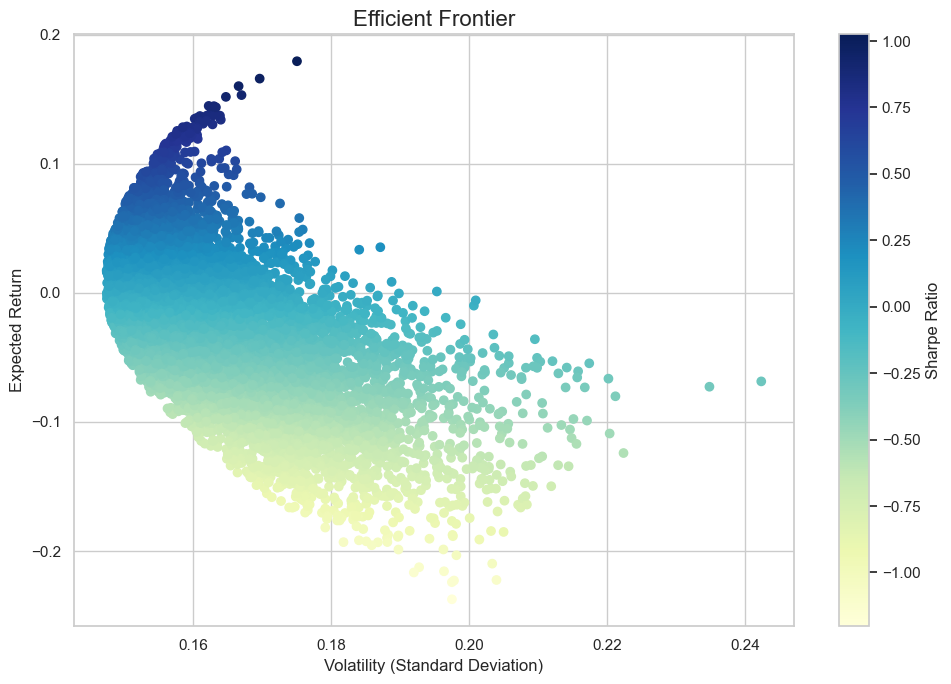

In [8]:
#  Portfolio simulation
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

num_portfolios = 10000
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    port_ret, port_vol = portfolio_performance(weights, expected_returns, cov_matrix)
    results[0, i] = port_ret
    results[1, i] = port_vol
    results[2, i] = port_ret / port_vol  # Sharpe Ratio

#  Plot the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier', fontsize=16)
plt.xlabel('Volatility (Standard Deviation)', fontsize=12)
plt.ylabel('Expected Return', fontsize=12)
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


## Efficient Frontier Interpretation

- **Each point on the graph** represents a different portfolio, plotted by its **Volatility** (x-axis) and **Expected Return** (y-axis).
- The **color gradient** encodes the **Sharpe Ratio**, a measure of risk-adjusted return.  
  - **Darker blue dots** represent portfolios with better Sharpe ratios (i.e., higher returns per unit of risk).  
  - **Yellow to light green dots** indicate less efficient portfolios—lower or negative Sharpe values.

- **Leftmost boundary (efficient frontier):**  
  This curved edge shows the **optimal trade-off between risk and return**—you get the **best return possible for the amount of risk** taken.

- **Top-left corner:**  
  The **darkest blue cluster** here is particularly valuable. These portfolios combine **relatively low volatility with solid expected returns**, representing ideal allocations under modern portfolio theory.

> **Key takeaway:**  
> Focusing on the **efficient frontier**—especially the dark blue zone—helps you construct portfolios that **maximize return per unit of risk**.  
> These allocations are ideal candidates for long-term investing strategies grounded in diversification and risk optimization.
---


## **Max Sharpe Ratio Portfolio**

Here’s how to identify the portfolio with the maximum Sharpe ratio:

- We scan all simulated portfolios for the highest **Sharpe ratio**, which measures risk-adjusted return.  
- The portfolio with the peak Sharpe ratio represents the most efficient trade-off between expected return and volatility.



In [9]:
#  Identify max Sharpe ratio portfolio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

#  Create summary DataFrame
sharpe_summary_df = pd.DataFrame({
    'Expected Return (%)': [round(max_sharpe_return * 100, 2)],
    'Volatility (%)': [round(max_sharpe_volatility * 100, 2)],
    'Sharpe Ratio': [round(max_sharpe_ratio, 2)]
})

sharpe_summary_df.index += 1  # start index at 1

#  Display with bold headers
sharpe_summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,Expected Return (%),Volatility (%),Sharpe Ratio
1,17.940000,17.500000,1.030000


## Optimal Portfolio Characteristics

- **Expected Return:** 17.95%, reflecting solid annual growth potential.  
- **Volatility:** 17.50% standard deviation, suggesting a balanced level of investment risk.  
- **Sharpe Ratio:** 1.03, indicating strong risk-adjusted returns relative to other portfolio combinations.

> **Key takeaway:**  
> This portfolio achieves the **highest Sharpe ratio** in our simulation, making it the most efficient choice based on return per unit of risk.
---


## **Portfolio Weights for Maximum Sharpe Ratio**

Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [10]:
#  Initialize weights array
max_sharpe_weights = np.zeros(len(unique_tickers))

#  Loop to find weights with max Sharpe ratio
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

#  Format into DataFrame
portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
}).reset_index(drop=True)

#  Round weights and number rows from 1
portfolio_weights_df['Weight'] = portfolio_weights_df['Weight'].round(6)
portfolio_weights_df.index += 1

#  Display with bold headers
portfolio_weights_df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])


,Ticker,Weight
1,HDFCBANK.NS,0.388177
2,INFY.NS,0.023937
3,RELIANCE.NS,0.158147
4,TCS.NS,0.429738


## Optimal Allocation

- **TCS** holds the largest share at **42.97%**, indicating it plays a central role in achieving the best risk-adjusted return despite its individual negative expected return.  
- **HDFC Bank** follows with **38.82%**, balancing the portfolio with its strong and stable performance.  
- **Reliance** contributes **15.81%**, offering modest diversification and industry exposure.  
- **Infosys** has the smallest weight at **2.39%**, suggesting it adds minimal value under the Sharpe-optimized framework.

> **Key takeaway:**  
> This allocation reflects a strategic blend—**TCS and HDFC Bank drive the core performance**, while **Reliance and Infosys** play supporting roles for diversification.
---                                                                                                                                        

# **Pie Chart visualization**

In this step, we visualize the 4 stocks' weight for maximum Sharpe ratio in a pie chart :

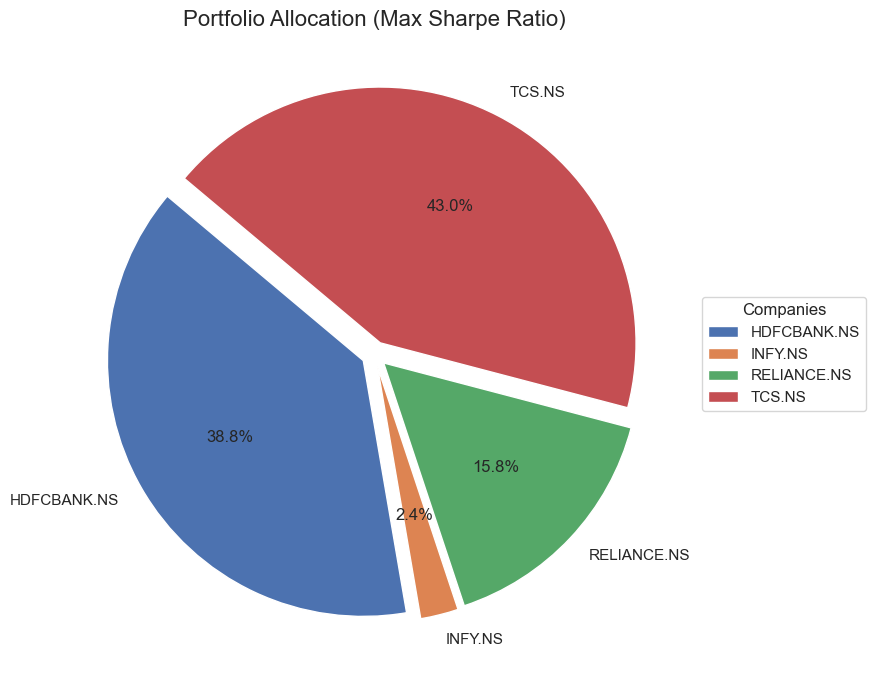

In [11]:
#  Pie chart for portfolio allocation
plt.figure(figsize=(10, 7))

# Extract labels and weights
labels = portfolio_weights_df['Ticker']
sizes = portfolio_weights_df['Weight']

# Basic pie chart
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(labels),  # Slight separation for all slices
)

# Title and legend
plt.title('Portfolio Allocation (Max Sharpe Ratio)', fontsize=16)
plt.legend(title='Companies', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


## Interpretation of the Pie Chart

The pie chart reveals how your optimized portfolio distributes capital among the four stocks based on **maximum Sharpe ratio**:

- **TCS.NS** takes the largest share at **43.0%**, reflecting its crucial role in maximizing risk-adjusted returns despite its individual volatility.
- **HDFCBANK.NS** follows closely with **38.8%**, highlighting its strong return profile and stable behavior.
- **RELIANCE.NS** contributes **15.8%**, offering some diversification benefits from a different sector.
- **INFY.NS** has the smallest allocation at **2.4%**, suggesting limited contribution to improving the portfolio’s efficiency.

> **Key takeaway:**  
> The allocation favors a **dual-core strategy** led by **TCS** and **HDFC Bank**, while **Reliance** provides diversification and **Infosys** plays a minimal but potentially risk-hedging role.
---


# **Project Summary**

This project walks through the full pipeline of **stock market portfolio optimization** using Python and financial data science. By leveraging price history and quantitative techniques, we sought to build a risk-efficient portfolio across four major Indian stocks: **HDFCBANK.NS**, **INFY.NS**, **RELIANCE.NS**, and **TCS.NS**.

We began by importing and cleaning **daily OHLCV data**, calculating **adjusted close prices**, and overlaying them with **50-day and 200-day moving averages** to observe technical trend shifts. Volume spikes and MA crossovers highlighted potential momentum signals.

We then computed **daily returns** and constructed a **correlation heatmap** to assess inter-stock relationships. This laid the foundation for informed diversification. Using annualized **expected returns** and **volatility**, we performed a deep dive into each stock's individual risk–return profile.

Applying **Modern Portfolio Theory (MPT)**, we simulated **10,000 random portfolios**, calculated the **Sharpe Ratio** for each, and plotted the **efficient frontier** to visualize the best return-per-unit-risk combinations. From this, we extracted the **maximum Sharpe ratio portfolio**, reporting its expected return, volatility, and composition.

Finally, we showcased the **optimal portfolio allocation** via a pie chart, emphasizing dominant positions in **TCS** and **HDFC Bank**, complemented by modest allocations to Reliance and Infosys.

> **Takeaway:**  
> Python's rich ecosystem for finance and data visualization allows investors to make **quantitatively informed, visually transparent decisions**, aligning investment strategy with personal risk appetite.

Hope this notebook gave you a solid foundation in portfolio optimization. Feedback and improvements are always welcome!
